## Sine series representations of functions
We saw in class that solutions to the heat equation on a bounded interval with Dirichlet boundary conditions can be constructed in the form of an infinite sum of sine functions. These infinite sums are a very powerful tool for studying PDEs. In this notebook, we will explore the convergence properties of such sums.

In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import integrate
from scipy import signal
import sympy as sp

### Computing sine sum representations
First, we calculate the coefficients $a_n=\frac{2}{\pi}\int_0^\pi f(x) \sin(nx) dx$ of the infinite sine sum representation $\sum_{n=1}^\infty a_n \sin(nx)$ of a given function $f(x)$ defined on the interval $[0,\pi]$ numerically. More precisely, we compute the coefficients of the partial sum $\sum_{n=1}^N a_n \sin(nx)$ for a given $N$.

In [2]:
# defines the basis functions we use to represent f(x)
def vn(x, n):
    v = np.sin(n*x)
    return v

# computes the partial sum of the first N+1 terms
def computeSeries(x, F, L, N):
    def computeCoeff(n):
        C1,D = integrate.quad(lambda x: F(x)*vn(x,n), 0, L)
        C2,D = integrate.quad(lambda x: vn(x, n)**2, 0, L)
        return C1/C2
    fs = np.array([computeCoeff(n)*vn(x,n) for n in range(1,N+1)])
    fs = fs.sum(axis=0)
    return fs.real

# smooth function satisfying the boundary conditions
def f1(x): return x**2*(L-x)

# smooth function not satisfying the boundary conditions
def f2(x): return 1+x**2

# nonsmooth function satisfying the boundary conditions
def f3(x): return np.sqrt(x)*np.sqrt(L-x)

# sawtooth wave
def f4(x): return (signal.sawtooth(4*np.pi/L*x)+1)/2

### Plotting functions and their sine series
Next, we compute and plot the partial sine sums of the following functions.
* $f(x)=x^2(\pi-x)$ is smooth and satisfies Dirichlet boundary conditions at $x=0,\pi$
* $f(x)=1+x^2$ is smooth but does not satisfy Dirichlet conditions
* $f(x)=\sqrt{x(\pi-x)}$ describes a semicircle that is not smooth but satisfies Dirichlet conditions
* $f(x)$ is the sawtooth function that has a jump discontinuity and does not satisfy the Dirichlet condition at $x=\pi$.

<IPython.core.display.Javascript object>


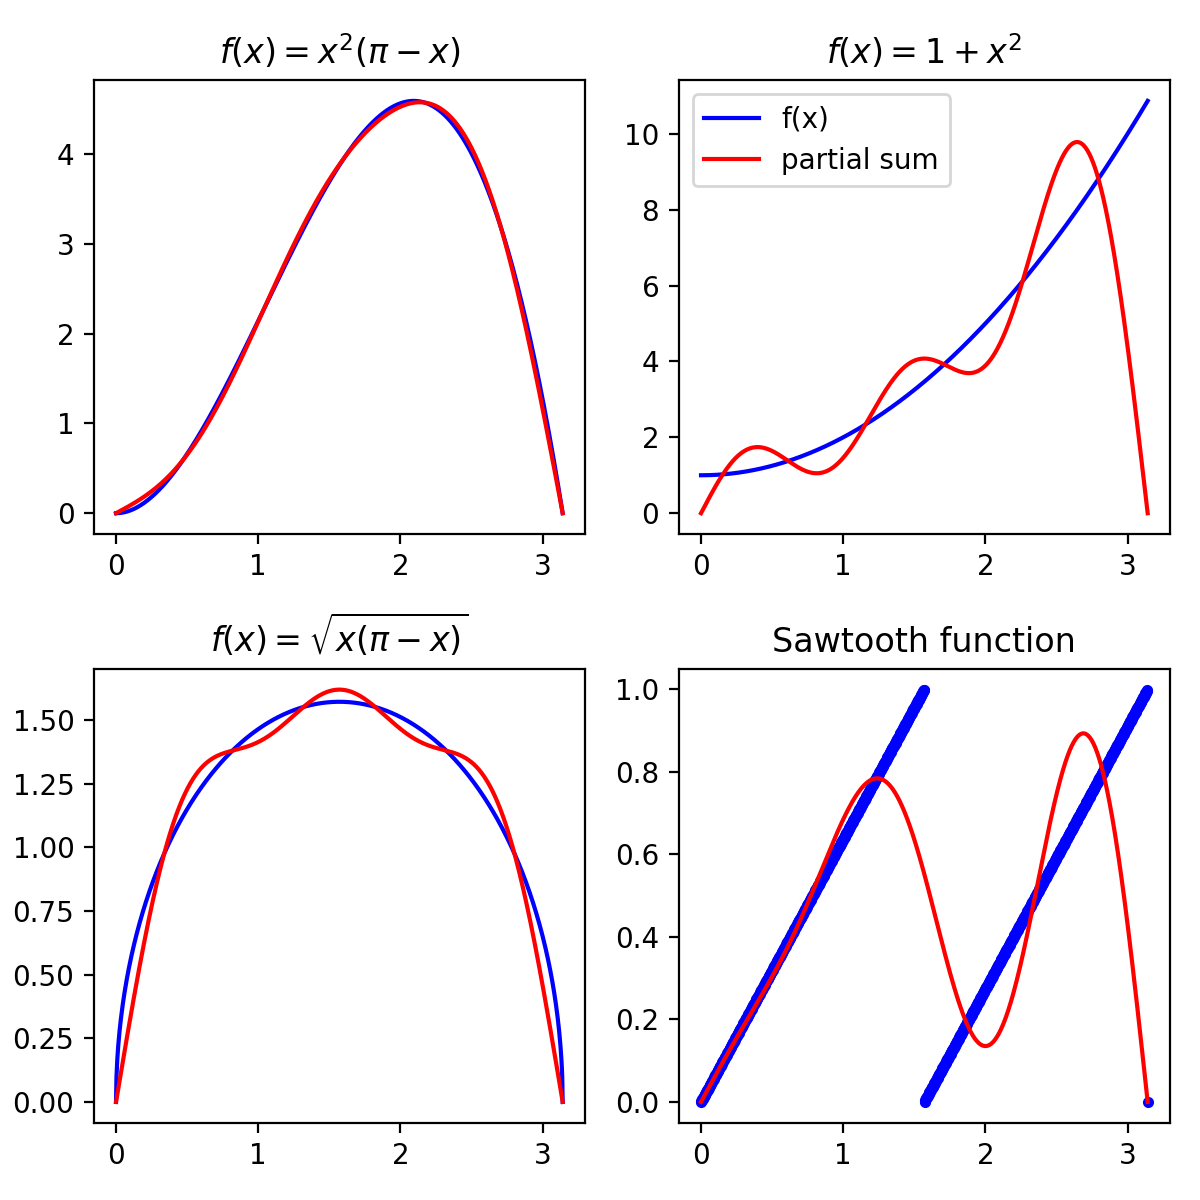

In [3]:
L = np.pi   # for interval [0,L]
N = 5      # choose number of elements in partial sum 

# Evaluate functions and partial sums
x = np.linspace(0,L,1000)
F1 = f1(x)
Fs1 = computeSeries(x, f1, L, N)
F2 = f2(x)
Fs2 = computeSeries(x, f2, L, N)
F3 = f3(x)
Fs3 = computeSeries(x, f3, L, N)
F4 = f4(x)
Fs4 = computeSeries(x, f4, L, N)

# Visualize partial sums
fig, ax = plt.subplots(2, 2, figsize=(6, 6))
ax[0,0].set_title("$f(x)=x^2(\pi-x)$")
ax[0,0].plot(x, F1, color="blue")
ax[0,0].plot(x, Fs1, color="red")
ax[0,1].set_title("$f(x)=1+x^2$")
ax[0,1].plot(x, F2, color="blue", label='f(x)')
ax[0,1].plot(x, Fs2, color="red", label='partial sum')
ax[0,1].legend()
ax[1,0].set_title("$f(x)=\sqrt{x(\pi-x)}$")
ax[1,0].plot(x, F3, color="blue")
ax[1,0].plot(x, Fs3, color="red")
ax[1,1].set_title("Sawtooth function")
ax[1,1].scatter(x, F4, marker='.', color="blue")
ax[1,1].plot(x, Fs4, color="red")
plt.tight_layout()
plt.show()

We can go back and increase $N$ to see how closely the function $f(x)$ is represented and approached by the partial sum $\sum_{n=1}^N a_n \sin(nx)$. Note that some of the partial sums seem to get closer to the original function $f(x)$ only for some but not all values of $x$.

### Animating partial sums
We now focus on the sawtooth function and use an animation to see how the partial sums behave as $N$ increases.

<IPython.core.display.Javascript object>


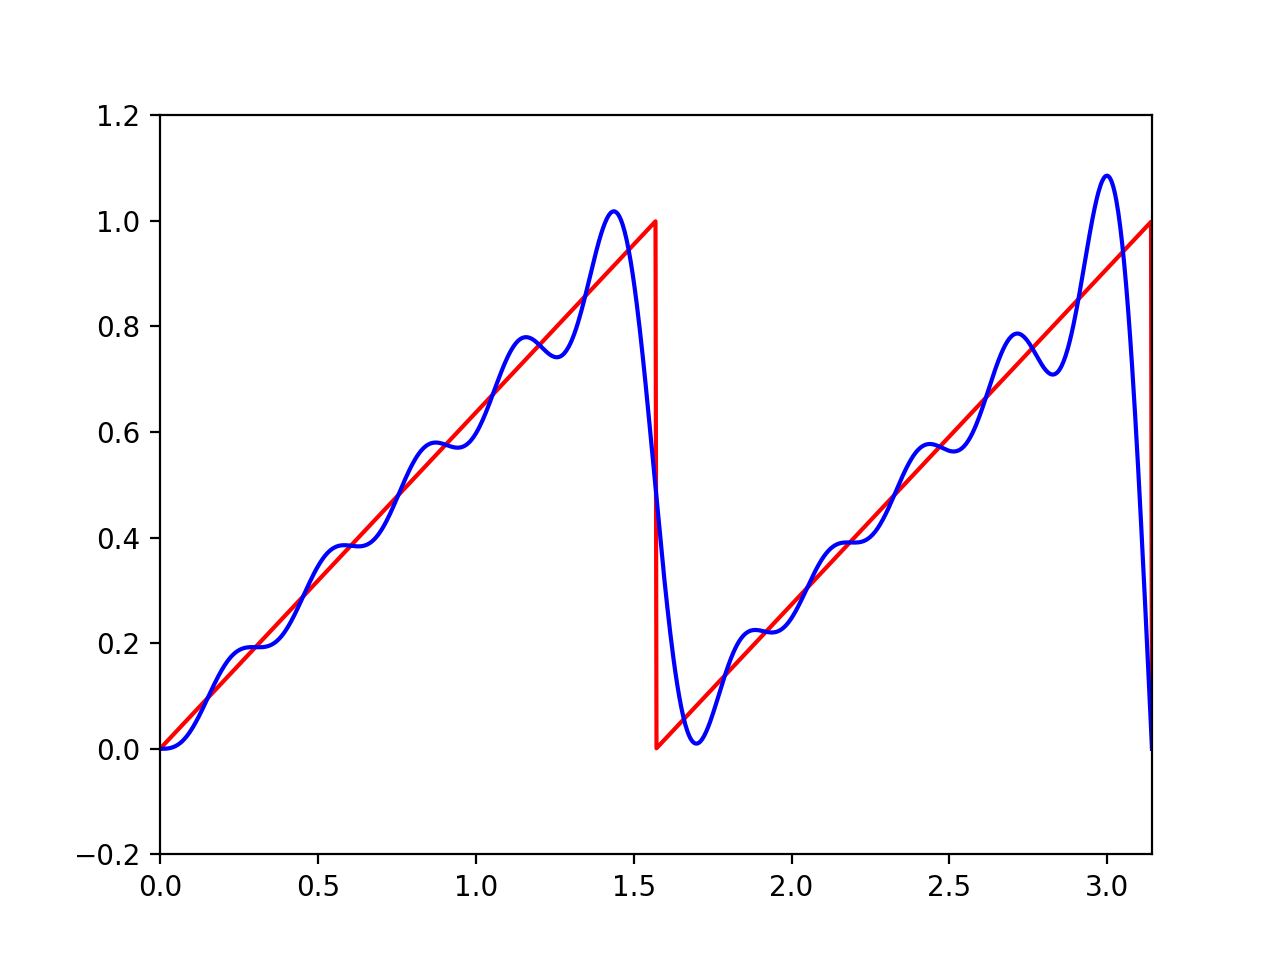

In [5]:
Nmax = 20

f = f4 # sawtooth function
F = F4

output = []
for n in range(1, Nmax+1):
    output.append(computeSeries(x, f, L, n))

fig = plt.figure()
ax  = plt.axes(xlim=(0,L), ylim=(-0.2,1.2))
line1, = ax.plot([], [], color = "red")
line2, = ax.plot([], [], color = "blue")

def update(t, line1, line2):
    line1.set_data(x, F)
    line2.set_data(x, output[t])
    return [line1,line2]

ani = animation.FuncAnimation(fig, update, frames=range(1, Nmax+1),
                              fargs=[line1, line2], interval=200, repeat=False)
plt.show()

Notice that at discontinuities or jumps in the graph (places where it is not continuous) the sequence of sums does not converge uniformly even when we add a large number of terms. This is called the Gibbs Phenomenon, and you can read more about it here: https://en.wikipedia.org/wiki/Gibbs_phenomenon.